In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.build import bulk
from ase.io import read

from scipy.optimize import minimize

In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file1='si.lda.upf'
PP_list = {'Si': path_pp+file1}

In [3]:
pwd

'/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc'

In [4]:
Ks_bcc_KE = []

for i in np.arange(0,30,1):
   
    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bcc = str(k).split()[6]
    Ks_bcc_KE.append(float(KS_bcc))
    


In [5]:
ks_ke = np.asarray(Ks_bcc_KE)

In [6]:
def min_energy(x0, *args):
        KS_KE, rho = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        OF_KE = KE(rho).energy
        diff = np.abs(KS_KE*1/2-OF_KE)
        return diff

In [7]:
l = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for i in np.arange(0,30,1):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.01, args = (KS_KE, rho), method='Powell', bounds=[[0.0,0.1]], options={'xtol': 1e-8,'ftol' : 1e-8})
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

Text(0, 0.5, '$ρ_{0}$')

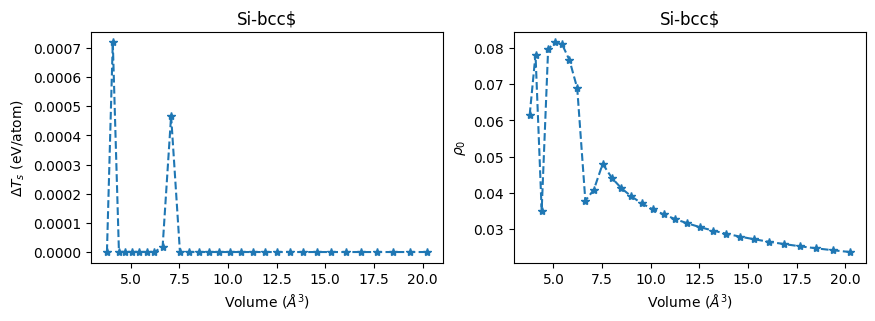

In [8]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-bcc$')
axs[1].set_title('Si-bcc$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

There exist multiple values of $\rho_{0}$ that can minimize the difference between KS and OF kinetic energy, for that in the two points we run again fe function min_energy and define new bounds where we know there will be a nother $\rho_{0}$ that minimizes the difference between both KE

In [9]:
pwd

'/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc'

In [10]:
l = np.linspace(0.8, 1.4, 30)
delta_E1 = []
R1 = []
vol1 = []
for i in np.arange(0,10,1):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.05, args = (KS_KE, rho), method='Powell', bounds=[[0.045,0.1]], options={'xtol': 1e-8,'ftol' : 1e-8})
    VOLUME = ions.get_volume()
    vol1.append(VOLUME)
    delta_E1.append(minn.fun)
    R1.append(minn.x)

In [11]:
rho0 = np.asarray(R0)
d_E = np.asarray(delta_E)
for i in np.arange(0,10,1):
    rho0[i] = np.asarray(R1[i])
    d_E[i] = np.asarray(delta_E1[i])

Text(0, 0.5, '$ρ_{0}$')

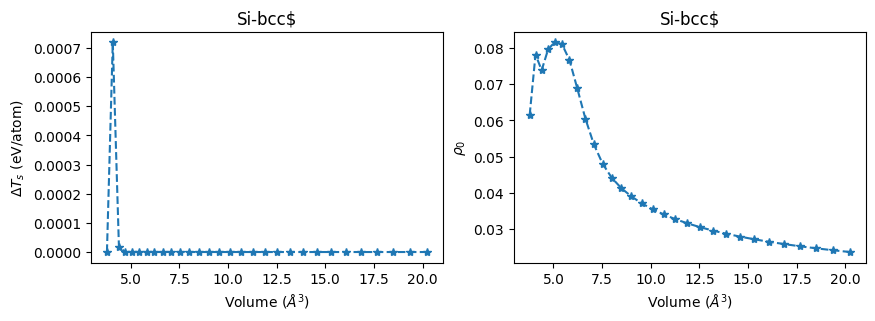

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rho0),'*--')
axs[0].set_title('Si-bcc$')
axs[1].set_title('Si-bcc$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [17]:
rho0.T

array([[0.06142715, 0.07812751, 0.07379412, 0.07957158, 0.08157818,
        0.080981  , 0.07661705, 0.06884122, 0.06048298, 0.0533694 ,
        0.04798181, 0.04408248, 0.04122169, 0.03897212, 0.03706547,
        0.03544246, 0.03400657, 0.03271692, 0.03156342, 0.03052393,
        0.02957794, 0.02870672, 0.02790857, 0.02717282, 0.02648589,
        0.02584552, 0.02524499, 0.02468115, 0.02415205, 0.02365586]])

In [13]:
l = np.linspace(0.8, 1.4, 30)
delta_E2 = []
R2 = []
vol2 = []
for i in np.arange(5,6,1):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.1, args = (KS_KE, rho), method='Powell', bounds=[[0.075,0.1]], options={'ftol' : 1e-1})
    VOLUME = ions.get_volume()
    vol2.append(VOLUME)
    delta_E2.append(minn.fun)
    R2.append(minn.x)

In [14]:
rho01 = np.asarray(rho0)
d_E1 = np.asarray(d_E)
for i in np.arange(5,6,1):
    rho01[i] = np.asarray(R2[0])
    d_E1[i] = np.asarray(delta_E2[0])

Text(0, 0.5, '$ρ_{0}$')

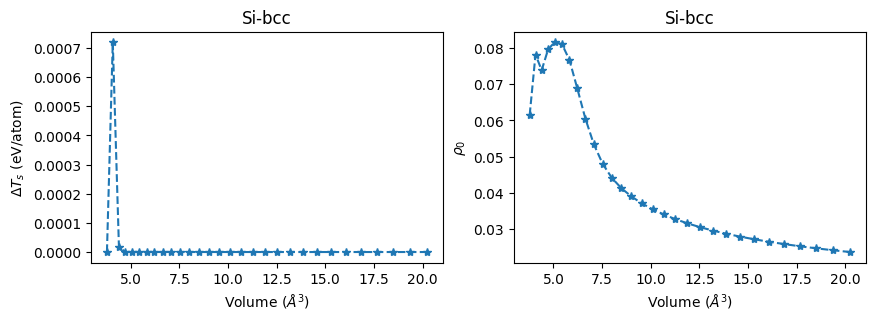

In [15]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rho0),'*--')
axs[0].set_title('Si-bcc')
axs[1].set_title('Si-bcc')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [ ]:
l = np.linspace(0.8, 1.4, 30)
delta_E3 = []
R3 = []
vol3 = []
for i in np.arange(4,5,1):
    print(i)
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.1, args = (KS_KE, rho), method='Powell', bounds=[[0.085,0.1]], options={'ftol' : 1e-1})
    VOLUME = ions.get_volume()
    vol3.append(VOLUME)
    delta_E3.append(minn.fun)
    R3.append(minn.x)

In [ ]:
rho02 = np.asarray(rho01)
d_E2 = np.asarray(d_E1)
for i in np.arange(4,5,1):
    rho02[i] = np.asarray(R3[0])
    d_E2[i] = np.asarray(delta_E3[0])

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rho02),'*--')
axs[0].set_title('Si-bcc')
axs[1].set_title('Si-bcc')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [ ]:
l = np.linspace(0.8, 1.4, 30)
delta_E4 = []
R4 = []
vol4 = []
for i in np.arange(0,4,1):
    rho = io.read_density('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bcc/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_KE = float(ks_ke[i])
    minn = minimize(min_energy, 0.1, args = (KS_KE, rho), method='Powell', bounds=[[0.08,0.1]], options={'ftol' : 0.5})
    VOLUME = ions.get_volume()
    vol4.append(VOLUME)
    delta_E4.append(minn.fun)
    R4.append(minn.x)

In [ ]:
rho03 = np.asarray(rho02)
d_E3 = np.asarray(d_E2)
for i in np.arange(0,4,1):
    rho03[i] = np.asarray(R4[0])
    d_E3[i] = np.asarray(delta_E4[0])

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(d_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(rho03),'*--')
axs[0].set_title('Si-bcc')
axs[1].set_title('Si-bcc')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [ ]:
d = np.asarray(rho03[0]) - np.asarray(R0)

In [ ]:
rho03.T

In [ ]:
d

We repeat the same procedure until find a smooth function of $\rho_{0}$

In [ ]:
R0=[0.1,0.09812751,0.09379412,0.08957158,0.08557818,0.080981,0.075,0.06884122,0.06048298,0.0533694,0.04798181,0.04408248,0.04122169,0.03897212,0.03706547,0.03544246,0.03400657,0.03271692,0.03156342,0.03052393,0.02957794,0.02870672,0.02790857,0.02717282,0.02648589,0.02584552,0.02524499,0.02468115,0.02415205,0.02365586]

In [ ]:
fig, axs = plt.subplots(1, figsize=(6,5))
im1 = axs.plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs.set_title('Si-bcc')
axs.set_xlabel('Volume ($\AA^{3}$)')
axs.set_ylabel('$\u03C1_{0}$')

In [ ]:
rh0 = []
for i in np.arange(0,len(l),1):
    r = float(R0[i])
    rh0.append(r)

In [ ]:
np.save(".../Si-bcc/DATA2/rho0.npy", R0)